# Topics

1. Experiments with LLM's.
2. Data Connectors
3. Core Components Of LlamaIndex.
4. High-Level API QA System.
5. Low-Level API QA System.

In [1]:
!pip install llama-index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.5/706.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4


# Experiments with LLM's

In [ ]:
from llama_index.llms import ChatMessage, OpenAI
import os
import openai
openai.api_key = 'YOUR_OPENAI_API_KEY'

messages = [
    ChatMessage(role="system", content="You are an AI assistant to user."),
    ChatMessage(role="user", content="What is the revenue of uber in 2021?"),
]
resp = OpenAI().chat(messages)
print(resp)

assistant: 
According to Forbes, Uber's revenue for 2021 is estimated to be around $25 billion.


# Data Connectors

A Data Connector in LlamaIndex is a functional component that facilitates the conversion of data from various sources like PDFs, YouTube videos, Audio files, webpages, Wikipedia pages, SQL Databases, docx files into a Document format, making it ready for ingestion by LlamaIndex.

There are 100+ data connectors/ data loaders available in LlamaHub - a simple library of all the data loaders / readers.

[llamahub.ai](https://llama-hub-ui.vercel.app/)

Let's start with reading a PDF file

## Setup

In [ ]:
# NOTE: This is ONLY necessary in jupyter notebook.
# Details: Jupyter runs an event-loop behind the scenes.
#          This results in nested event-loops when we start an event-loop to make async queries.
#          This is normally not allowed, we use nest_asyncio to allow it for convenience.
import nest_asyncio

nest_asyncio.apply()

In [ ]:
from pathlib import Path
from llama_index import download_loader

PDFReader = download_loader("PDFReader")

loader = PDFReader()
documents = loader.load_data(file=Path('./uber_10k_2021.pdf'))

In [ ]:
len(documents)

307

In [ ]:
documents[0].text

'UNITED STATESSECURITIES AND EXCHANGE COMMISSION\nWashington, D.C. 20549\n____________________________________________ \nFORM\n 10-K____________________________________________ \n(Mark One)\n☒\n ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934For the fiscal year ended\n December 31, 2021OR\n☐\n TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934For the transition period from_____ to _____            \nCommission File Number: 001-38902\n____________________________________________ \nUBER TECHNOLOGIES, INC.\n(Exact name of registrant as specif\nied in its charter)____________________________________________ \nDelaware\n45-2647441 (State or other jurisdiction of inco\nrporation or organization)(I.R.S. Employer Identification No.) 1515 3rd Street\nSan Francisco, California 94158\n(Address of principal executive offic\nes, including zip code)(415) 612-8582\n(Registrant’s telephone number, including area code)\n _______

In [ ]:
text = ''

for document in documents:
  text = text + "\n" + document.text

In [ ]:
messages = [
    ChatMessage(role="system", content="You are an AI assistant to user."),
    ChatMessage(role="user", content=f"{text} \n What is the revenue of uber in 2021?"),
]
resp = OpenAI().chat(messages)
print(resp)

ValueError: ignored

In [ ]:
import tiktoken

encoding = tiktoken.get_encoding("r50k_base")

num_tokens = len(encoding.encode(text))

In [ ]:
from IPython.display import display, HTML
display(HTML(f'<p style="font-size:20px">{num_tokens}</p>'))

# Core Components Of LlamaIndex
1.   Index
2.   Reriever
3.   Response Synthesizer.
4.   Query Engine.

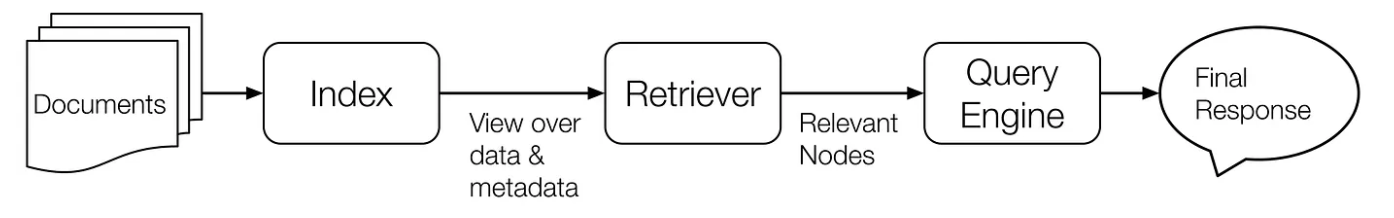

1. Index: It's the "library" of your data - Stores your data.
2. Retriever: It's the "librarian" that finds relevant data - Finds data.
3. Response Synthesizer: It's the "storyteller" that creates a response - Makes responses.
4. QueryEngine: It's the "director" that makes everything work together - Coordinates everything.

# Building High-Level API QA System.

In [ ]:
from llama_index import VectorStoreIndex
import os
import openai
from IPython.display import display, HTML

# Construct an index by loading documents into a VectorStoreIndex.
index = VectorStoreIndex.from_documents(documents)

# Construct Query Engine
query_engine = index.as_query_engine()

# Query the engine.
response = query_engine.query("What is the revenue of uber in 2021?")

# print the synthesized response.
display(HTML(f'<p style="font-size:20px">{response.response}</p>'))


In [ ]:
response.source_nodes

[NodeWithScore(node=TextNode(id_='e31bce0f-a829-4802-a803-8fb3a75ddbe1', embedding=None, metadata={'page_label': '57', 'file_name': 'uber_10k_2021.pdf'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='d3a8e631-5192-45b6-8c39-1d19aaea1dd0', node_type=None, metadata={'page_label': '57', 'file_name': 'uber_10k_2021.pdf'}, hash='e802bd56c54f9ed9a68f43b6be28be8f2855448eaca773810308c481898ac2dc')}, hash='d267ed8e5e26d96b1574648fe9e45d8cbd0e0ef9d0818d326975e821b49e94e8', text='The following table sets forth the components of our consolidated statements of operations for each of the periods presented as a percentage of revenue : Year Ended December 31,\n2020\n2021 Revenue\n100 %100 %Costs and expenses\nCost of revenue, exclusive of dep\nreciation and amortization shown separately below46 %54 %Operations and support\n16 %11 %Sales and marketing\n32 %27 %Research and development\n20 %12 %General and administ

# Building Low-Level API QA System.

In [ ]:
from llama_index.retrievers import VectorIndexRetriever
from llama_index.response_synthesizers import get_response_synthesizer
from llama_index.query_engine import RetrieverQueryEngine

# configure retriever
retriever = VectorIndexRetriever(
 index = index,
 similarity_top_k=3
)

# configure response synthesizer
synth = get_response_synthesizer(
    response_mode="accumulate"
)

# construct query engine
query_engine = RetrieverQueryEngine(
 retriever=retriever,
 response_synthesizer=synth,
)

response = query_engine.query("What information do you have about zomato investment?")

In [ ]:
display(HTML(f'<p style="font-size:20px">{response.response}</p>'))


In [ ]:
response.source_nodes

[NodeWithScore(node=TextNode(id_='47f3148b-5132-4174-818d-3a53e5818429', embedding=None, metadata={'page_label': '133', 'file_name': 'uber_10k_2021.pdf'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='9695b784-0282-4a35-9546-a2b7db05c1d6', node_type=None, metadata={'page_label': '133', 'file_name': 'uber_10k_2021.pdf'}, hash='13c20fb41e3811add53a95550258a92a5a2c19c8a1e40202fb8ce856818dc99a'), <NodeRelationship.PREVIOUS: '2'>: RelatedNodeInfo(node_id='d9fa87bc-2947-4e20-a935-70ef85b4d7b4', node_type=None, metadata={'page_label': '133', 'file_name': 'uber_10k_2021.pdf'}, hash='b3f47969acf00db772b4d933ab85c1c1d6a80b10838003a55fab6d1fae5a8519')}, hash='156ba334a2f36791a9f1836bab17233ca4f2ff8148157add3922e99eb358e106', text='Eats India”), and anote\n receivable valued at $35 million for reimbursement of goods and services tax. As of December 31, 2020, our investment in the CCPS Preferred Shares ofZomat

In [ ]:
from llama_index import ListIndex

# Construct an index by loading documents into a ListIndex.
index = ListIndex.from_documents(documents[0:10])

# Construct Query Engine
query_engine = index.as_query_engine(
    response_mode="tree_summarize")

# Query the engine.
response = query_engine.query("What is the summary of the document?")

# print the synthesized response.
display(HTML(f'<p style="font-size:20px">{response.response}</p>'))
